# Kurulum

In [1]:
!pip install ultralytics
!pip install opencv-python
!pip install cvzone
print("Hata yoksa kuruldu demektir")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.0/721.0 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26297 sha256=95a64a10cbcf8a75e58468562d894e009c172ac06ea93dadd70537f1905829a7
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone
Hata yoksa kuruldu demektir


# Kütüphaneleri Koda Dahil Etme

In [2]:
import ultralytics
from ultralytics import YOLO
import cv2
import cvzone
import math
from google.colab.patches import cv2_imshow
import numpy

# Kod

<IPython.core.display.Javascript object>

photo.jpg olarak kaydedildi
İsaretlenmemis fotograf:


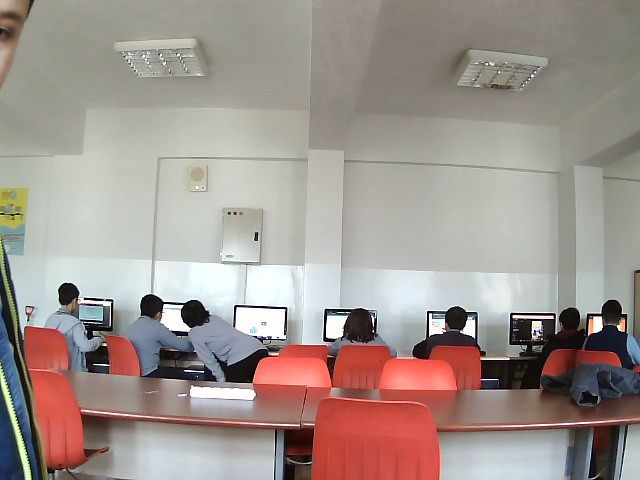


0: 480x640 6 persons, 10 chairs, 3 tvs, 24.1ms
Speed: 1.7ms preprocess, 24.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
İsaretlenmis fotograf:


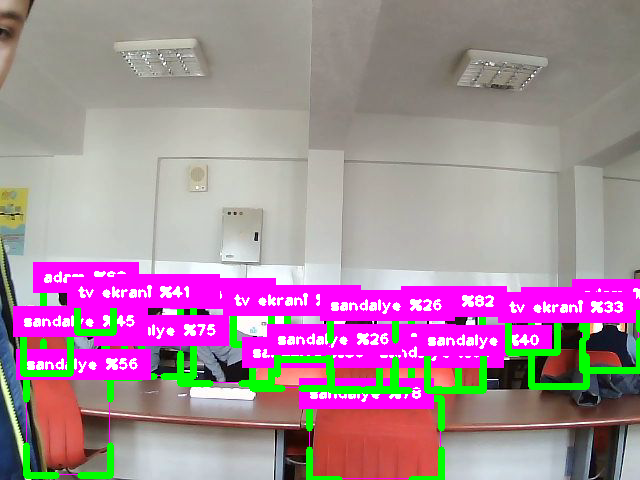

-1

In [19]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      return new Promise(resolve => {
        setTimeout(() => {
          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getVideoTracks()[0].stop();
          div.remove();
          resolve(canvas.toDataURL('image/jpeg', quality));
        }, 500); // 0.5 saniye sonra otomatik olarak fotoğrafı çek
      });
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

try:
  filename = take_photo()
  print('{} olarak kaydedildi'.format(filename))
  print("İsaretlenmemis fotograf:")
  display(Image(filename))
except Exception as err:
  # Hata durumunda
  print(str(err))

cap = cv2.VideoCapture('photo.jpg')
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

model = YOLO('../YOLO Weights/yolov8n.pt')

classNames = ["adam", "bisiklet", "araba", "motosiklet", "ucak", "otobüs", "tren", "kamyon", "bot", "trafik isigi", "yangin muslugu",
               "dur", "parkmetre","bank", "kus","kedi","kopek","at","koyun","inek","fil","ayi","zebra","zurafa",
               "sirt canta", "semsiye", "el canta", "krafat", "bavul", "bumerang", "kayak", "kayak tahtasi", "top", "ucurtma", "beyzbol sopasi",
               "beyzbol eldiveni", "kaykay", "sorf tahtasi", "tenis raketi", "sise", "haram", "fincan", "catal", "bicak", "kasik", "kase", "muz",
               "elma", "sandvic", "portakal", "brokoli", "havuc", "sosisli sandvic", "pizza", "donut", "kek", "sandalye", "kanepe", "saksi bitki", "yatak",
               "masa", "tuvalet", "tv ekrani", "laptop", "fare", "uzaktan kumanda", "klavye", "cep telefonu", "mikrodalga", "firin", "ekmek kizartma makinesi",
               "lavabo", "buzdolabi", "kitap", "saat", "vazo", "makas", "oyuncak ayi", "sac kurutma makinesi", "dis fircasi"]

success, img = cap.read()
results = model(img, stream=True)

for r in results:
    boxes = r.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        w, h = x2-x1, y2-y1
        cvzone.cornerRect(img, (x1, y1, w, h))
        conf = math.ceil((box.conf[0]*100))
        cls = box.cls[0]
        name = classNames[int(cls)]
        cvzone.putTextRect(img, f'{name} '"%"f'{conf}', (max(0,x1), max(35,y1)), scale = 1, thickness = 2)
print("İsaretlenmis fotograf:")
cv2_imshow(img)
cv2.waitKey(1)

**Bu şekilde kodumuzu test ettik**

# Kaynak
[Object Detection with YOLO and OpenCV: A Practical Guide](https://medium.com/@tejasdalvi927/object-detection-with-yolo-and-opencv-a-practical-guide-cf7773481d11)